In [1]:
from workshop.dataset import CUBDataset
from workshop.model import BirdNet
from torch.utils.data import DataLoader
from torchvision.transforms import Compose, RandomCrop, RandomHorizontalFlip, ToTensor, Resize
import matplotlib.pyplot as plt
import torch
import numpy as np

from pathlib import Path

### View examples of training data

In [2]:
datapath = "/local_storage/datasets/CUB_20"
batch_size = 32

ds_train = CUBDataset(
        root=datapath,
        train=True,
        transforms=Compose([
            Resize(256),
            RandomCrop((224, 224), pad_if_needed=True),
            RandomHorizontalFlip(),
            ToTensor()
        ])
    )
data_loader_train = DataLoader(
    ds_train,
    batch_size=batch_size,
    shuffle=True,
    num_workers=1)

ds_test = CUBDataset(
        root=datapath,
        train=False,
        transforms=Compose([
            Resize(256),
            RandomCrop((224, 224), pad_if_needed=True),
            RandomHorizontalFlip(),
            ToTensor()
        ])
    )
data_loader_test = DataLoader(
    ds_test,
    batch_size=batch_size,
    shuffle=True,
    num_workers=1)

model = BirdNet(20)

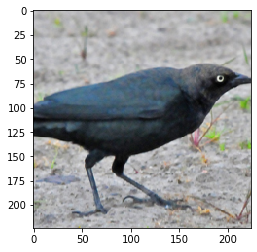

Example of: 009.Brewer_Blackbird


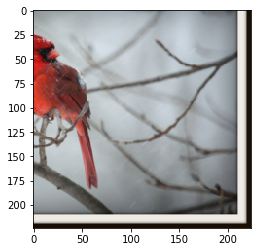

Example of: 017.Cardinal


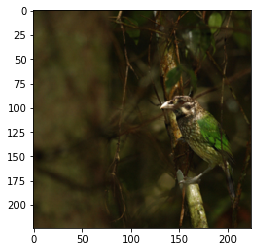

Example of: 018.Spotted_Catbird


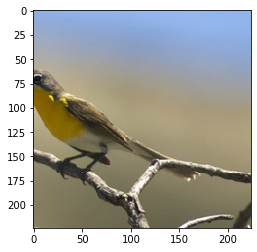

Example of: 020.Yellow_breasted_Chat


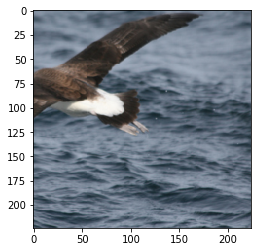

Example of: 002.Laysan_Albatross


In [4]:
EXAMPLES_TO_SHOW = 5
batch = next(iter(data_loader_train))
img_batch = batch[0]
targets = batch[1]
for imgIdx, image in enumerate(img_batch):
    image = image.permute(1,2,0)
    plt.imshow(image)
    plt.show()
    print("Example of: %s" %(ds_train.label_to_class_name(targets[imgIdx].item())))
    if imgIdx+1 == EXAMPLES_TO_SHOW:
        break


### Load trained model

In [5]:
project_dir = Path("..").resolve()

#edit this to be a run you have actually conducted
model_path = project_dir/"runs/bs64_lr0.001_wd1e-05_XN8QZ7FOVG/final_model.pt"
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

### View inference examples on test data

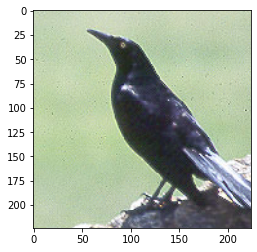

Guessed class: 018.Spotted_Catbird, ground truth: 009.Brewer_Blackbird


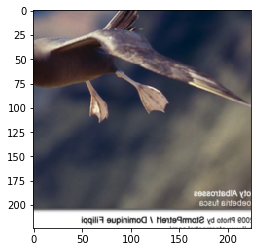

Guessed class: 018.Spotted_Catbird, ground truth: 003.Sooty_Albatross


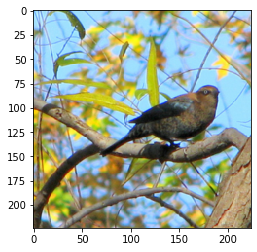

Guessed class: 013.Bobolink, ground truth: 011.Rusty_Blackbird


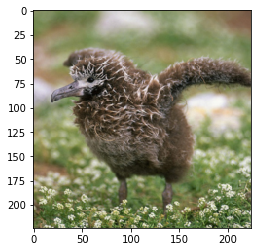

Guessed class: 018.Spotted_Catbird, ground truth: 002.Laysan_Albatross


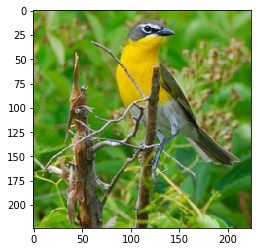

Guessed class: 018.Spotted_Catbird, ground truth: 020.Yellow_breasted_Chat


In [7]:
EXAMPLES_TO_SHOW=5
batch = next(iter(data_loader_test))
input_ = batch[0]
target = batch[1]
output_ = model(input_)

for datapointIdx, img in enumerate(input_): 
    img = input_[datapointIdx]
    prediction = output_[datapointIdx].argmax().item()
    pltImage = img.permute(1,2,0)
    plt.imshow(pltImage)
    plt.show()
    print("Guessed class: %s, ground truth: %s" %(ds_test.label_to_class_name(prediction), ds_test.label_to_class_name(target[datapointIdx].item())))
    if(datapointIdx+1==EXAMPLES_TO_SHOW):
        break
    
    